In [2]:
import seaborn as sn
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('bikes.csv')
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


In [5]:
df.isnull().sum()

datetime                 0
season                 214
holiday                856
workingday            1498
weather               2140
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
dtype: int64

In [6]:
x= ((df['registered']*5)+(df['casual']*20))
df['Profit']=x-((0.14*100/x)+(1500/8760))

In [7]:
df['datetime']=pd.to_datetime(df['datetime'])

In [8]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,124.716767
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,319.785017
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,234.769193
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,109.701494
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,2.028767
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1784.820924
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1354.818435
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,899.813212
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,824.811797


In [9]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
imputer2=SimpleImputer(strategy='median')

In [15]:
df['day']=df['datetime'].dt.day_name()

In [10]:
df[['windspeed','temp','humidity','holiday','workingday']]=imputer2.fit_transform(df[['windspeed','temp','humidity','holiday','workingday']])

In [11]:
df[['weather','season']]=imputer.fit_transform(df[['weather','season']])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10886 non-null  object        
 2   holiday             10886 non-null  float64       
 3   workingday          10886 non-null  float64       
 4   weather             10886 non-null  object        
 5   temp                10886 non-null  float64       
 6   humidity            10886 non-null  float64       
 7   windspeed           10886 non-null  float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  Profit              10886 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 1020.7+ KB


<AxesSubplot:xlabel='season', ylabel='count'>

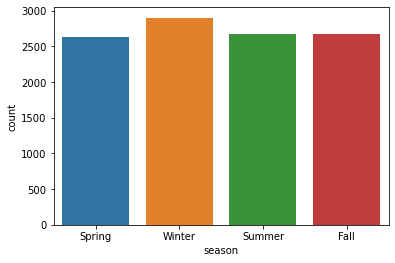

In [13]:
sn.countplot(data=df,x='season')

<AxesSubplot:xlabel='weather', ylabel='count'>

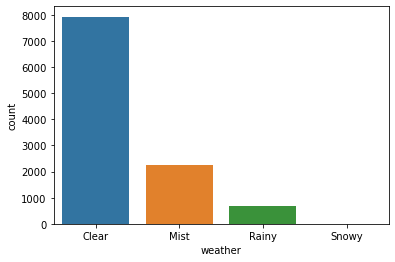

In [14]:
sn.countplot(data=df,x='weather')

In [16]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,day
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,12.9980,3,13,16,124.716767,Saturday
1,2011-01-01 01:00:00,Spring,0.0,0.0,Clear,9.02,80.0,0.0000,8,32,40,319.785017,Saturday
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,62.0,0.0000,5,27,32,234.769193,Saturday
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,109.701494,Saturday
4,2011-01-01 04:00:00,Winter,0.0,0.0,Clear,20.50,75.0,12.9980,0,1,1,2.028767,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1784.820924,Wednesday
10882,2012-12-19 20:00:00,Winter,0.0,1.0,Clear,14.76,62.0,12.9980,10,231,241,1354.818435,Wednesday
10883,2012-12-19 21:00:00,Winter,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,899.813212,Wednesday
10884,2012-12-19 22:00:00,Winter,0.0,1.0,Clear,13.94,62.0,6.0032,12,117,129,824.811797,Wednesday


<AxesSubplot:xlabel='Profit', ylabel='Density'>

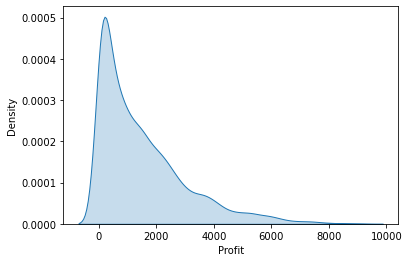

In [21]:
sn.kdeplot(df['Profit'],shade=True)

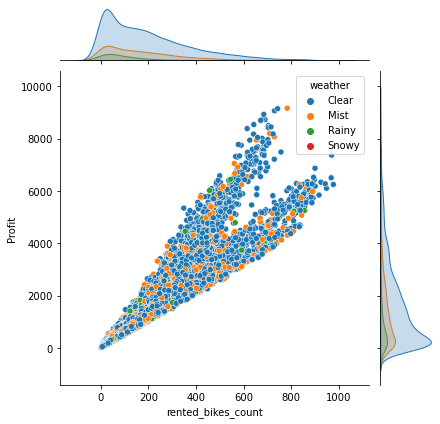

In [23]:
sn.jointplot(data=df,x='rented_bikes_count',y='Profit',hue='weather')

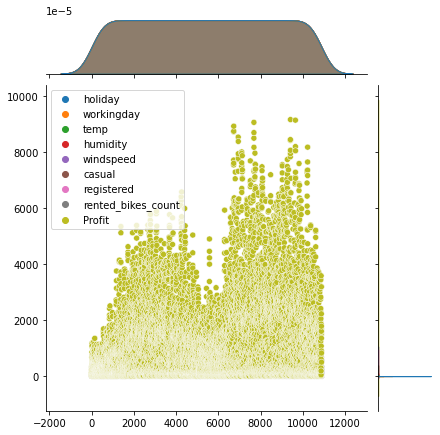

In [24]:
sn.jointplot(data=df)

<AxesSubplot:>

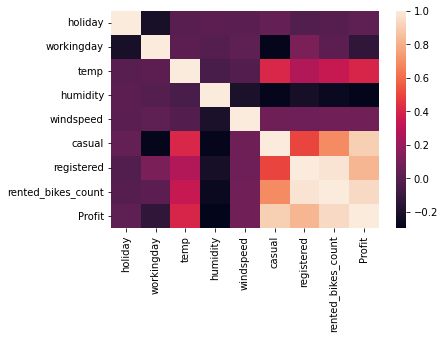

In [25]:
sn.heatmap(df.corr())

<AxesSubplot:xlabel='rented_bikes_count'>

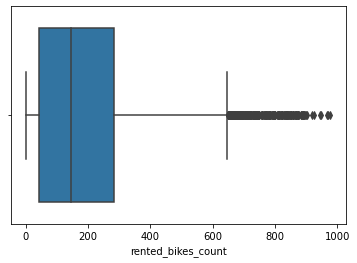

In [28]:
sn.boxplot(data=df,x='rented_bikes_count')

<AxesSubplot:xlabel='registered'>

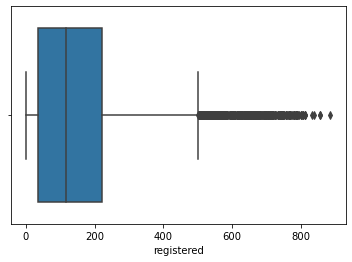

In [29]:
sn.boxplot(data=df,x='registered')

<AxesSubplot:xlabel='Profit'>

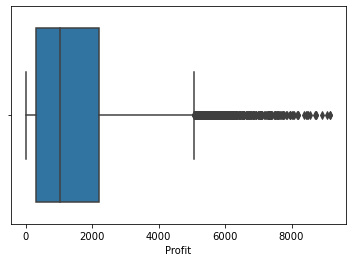

In [30]:
sn.boxplot(data=df,x='Profit')

<AxesSubplot:xlabel='weather', ylabel='rented_bikes_count'>

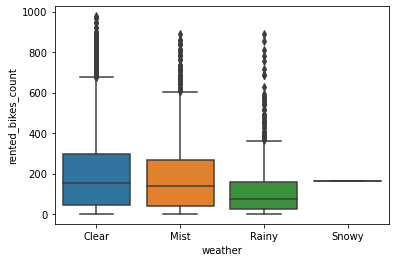

In [31]:
sn.boxplot(data=df,x='weather',y='rented_bikes_count')

<AxesSubplot:xlabel='weather', ylabel='Profit'>

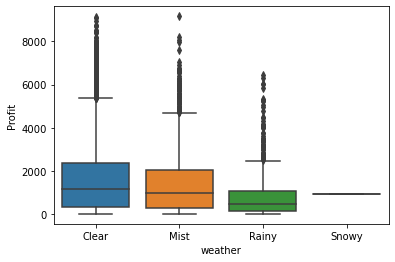

In [32]:
sn.boxplot(data=df,x='weather',y='Profit')

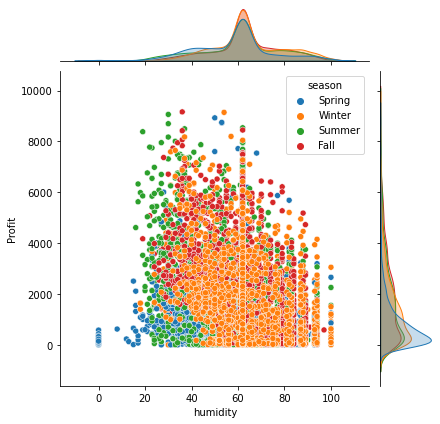

In [34]:
sn.jointplot(data=df,x='humidity',y='Profit',hue='season')

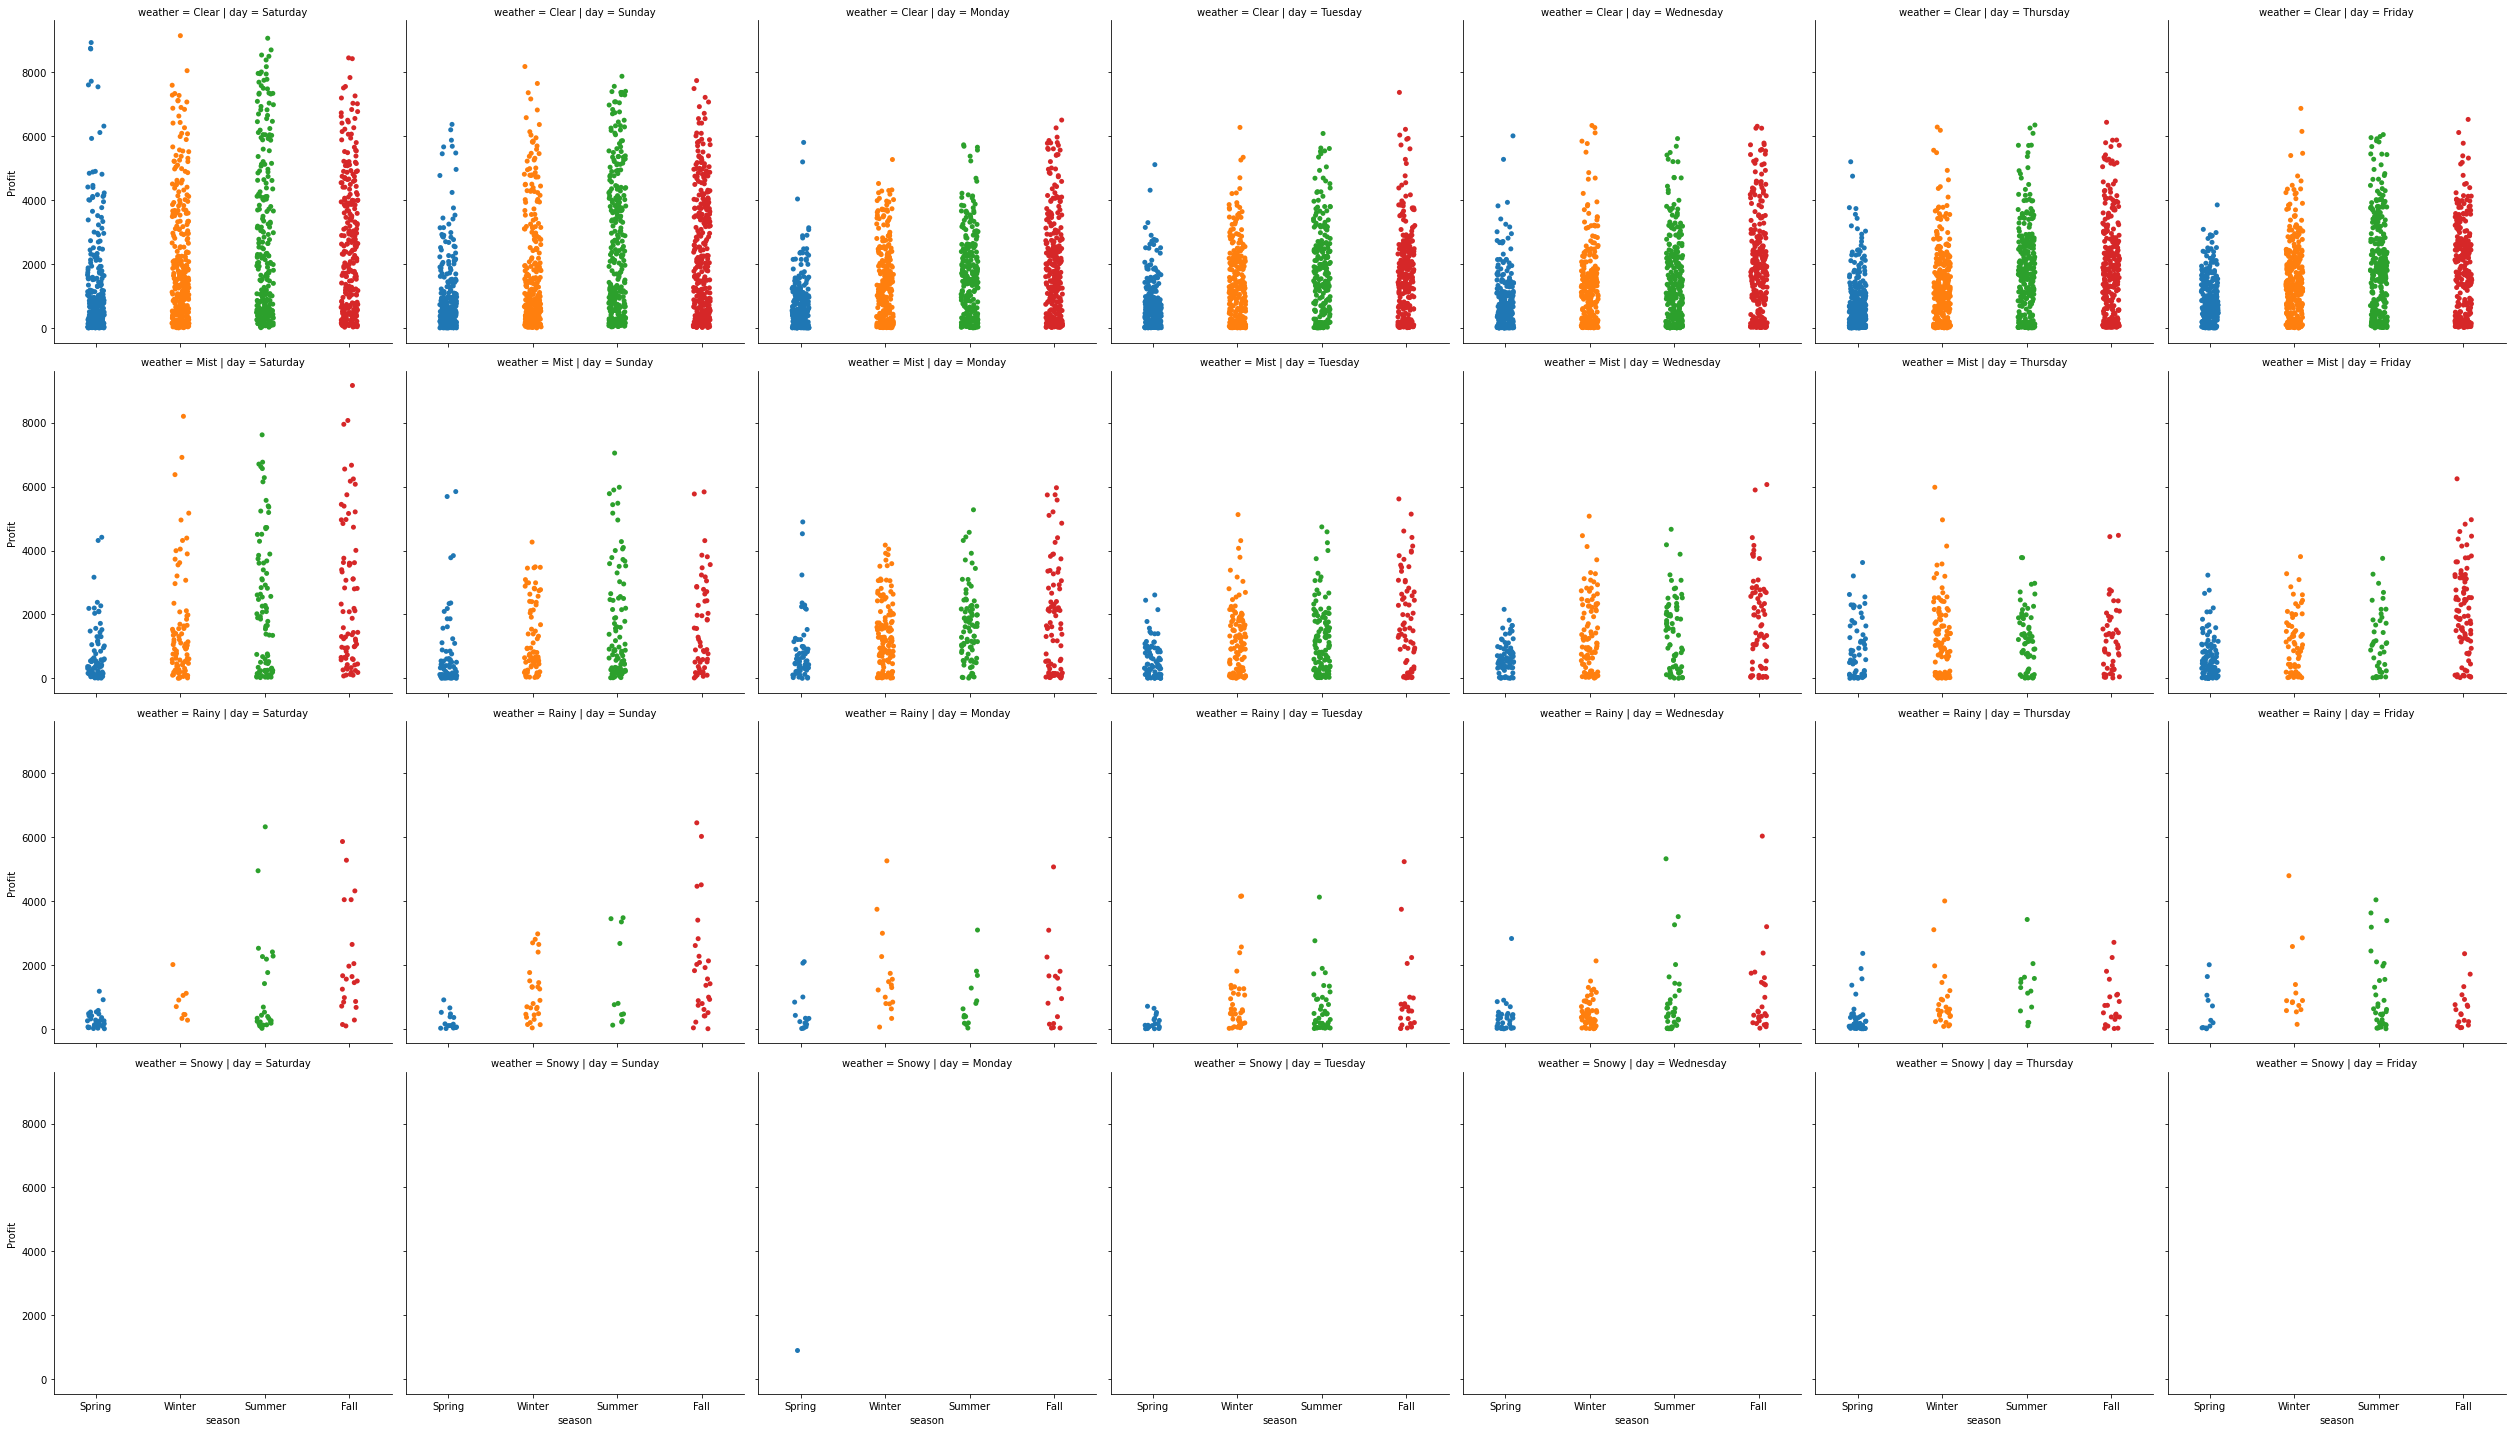

In [39]:
sn.catplot(data=df,x='season',y='Profit',row='weather',col='day')

In [3]:
df2=pd.read_csv('loan_data.csv')
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

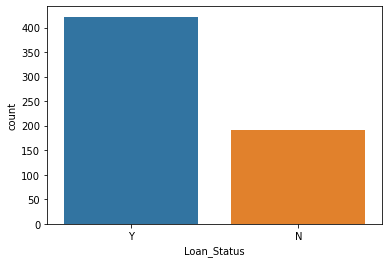

In [6]:
sn.countplot(data=df2,x='Loan_Status')

<AxesSubplot:xlabel='Education', ylabel='count'>

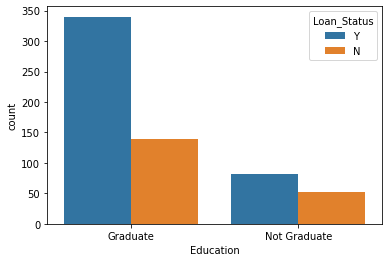

In [12]:
sn.countplot(data=df2,x='Education',hue='Loan_Status')

In [8]:
df2.drop('Loan_ID',axis=1,inplace=True)

In [9]:
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Gender', ylabel='count'>

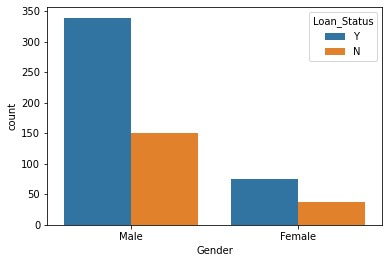

In [11]:
sn.countplot(data=df2,x='Gender',hue='Loan_Status')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

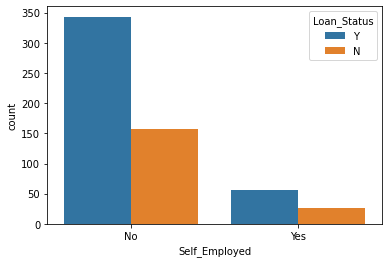

In [13]:
sn.countplot(data=df2,x='Self_Employed',hue='Loan_Status')

<AxesSubplot:xlabel='Married', ylabel='count'>

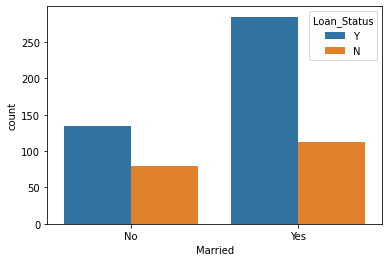

In [14]:
sn.countplot(data=df2,x='Married',hue='Loan_Status')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

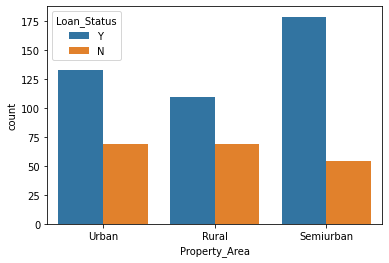

In [15]:
sn.countplot(data=df2,x='Property_Area',hue='Loan_Status')

<AxesSubplot:>

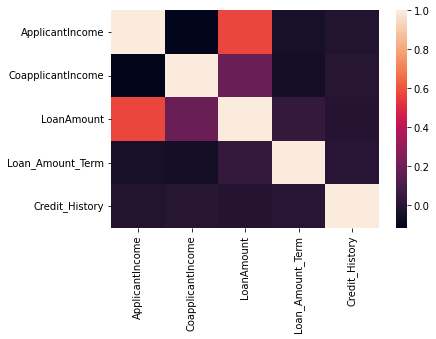

In [16]:
sn.heatmap(df2.corr())

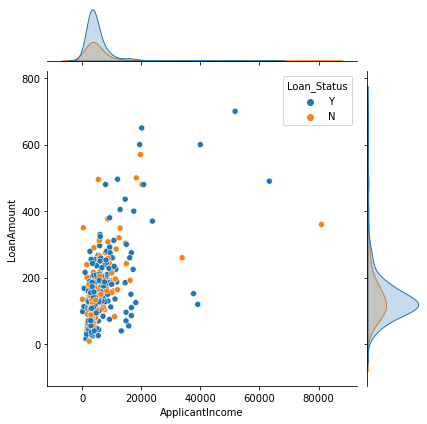

In [18]:
sn.jointplot(data=df2,x='ApplicantIncome',y='LoanAmount',hue='Loan_Status')

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

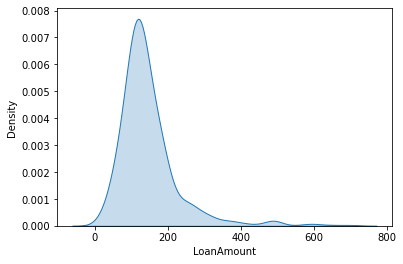

In [19]:
sn.kdeplot(data=df2,x='LoanAmount',shade=True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

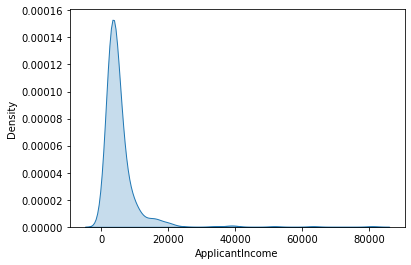

In [20]:
sn.kdeplot(data=df2,x='ApplicantIncome',shade=True)

In [21]:
df2['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

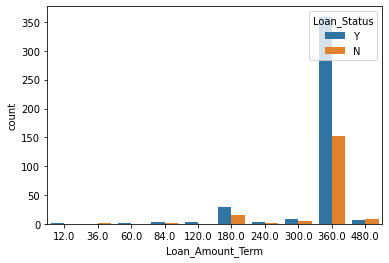

In [23]:
sn.countplot(data=df2,x='Loan_Amount_Term',hue='Loan_Status')

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

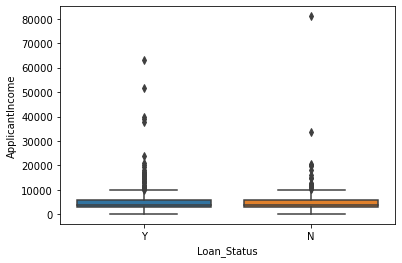

In [24]:
sn.boxplot(data=df2,x='Loan_Status',y='ApplicantIncome')

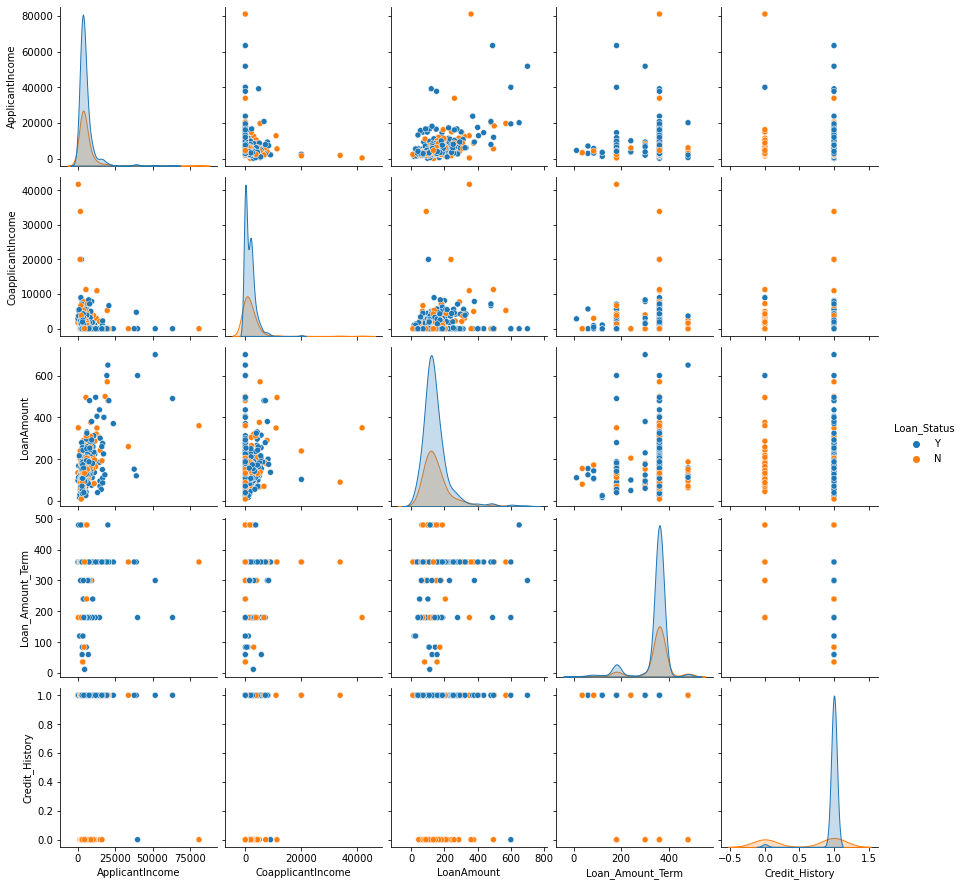

In [26]:
sn.pairplot(data=df2,hue='Loan_Status')